In [28]:
# Important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load Netflix dataset

df = pd.read_csv('data/netflix_titles.csv')

In [30]:
# First 5 rows

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [31]:
# Number of rows and columns

df.shape

(8807, 12)

In [32]:
# Basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [33]:
# All the columns

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Missing values

In [34]:
# columns with missing values

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [39]:
# Missing values in columns (%)

round(df.isnull().mean()*100, 2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

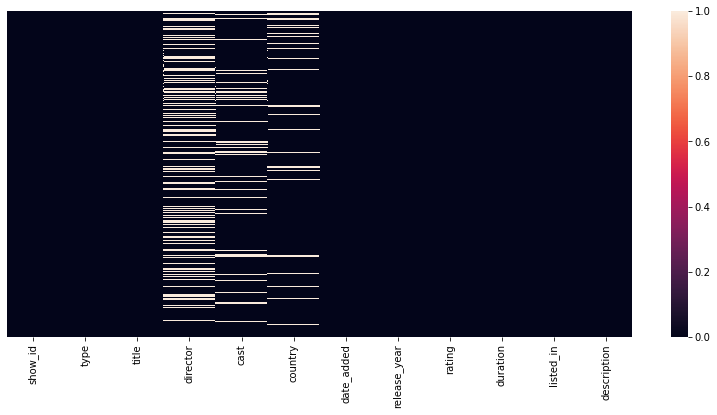

In [43]:
# Missing value visualization

plt.rcParams['figure.figsize'] = (14, 6)
sns.heatmap(df.isnull(), yticklabels=False);

In [44]:
# Fill unknown with null value in director column

df['director'] = df['director'].fillna('unknown')

In [45]:
df['director'].isnull().sum()

0

In [48]:
# cast

df['cast'] = df['cast'].fillna('unknown')

In [49]:
df['cast'].isnull().sum()

0

In [52]:
# Fill Country missing values with mode

df['country'] = df['country'].fillna(df['country'].mode()[0])

In [54]:
df['country'].isnull().sum()

0

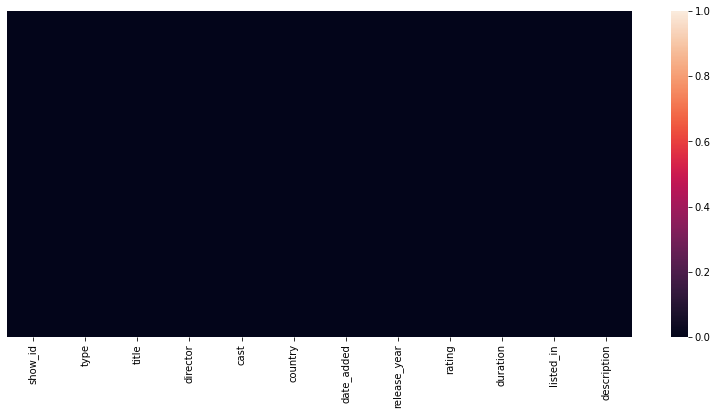

In [56]:
sns.heatmap(df.isnull(), yticklabels=False);

In [57]:
# unique value present in each column

df.nunique()

show_id         8807
type               2
title           8807
director        4529
cast            7693
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [58]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [75]:
# Count the type (Movie or TV Show)

df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

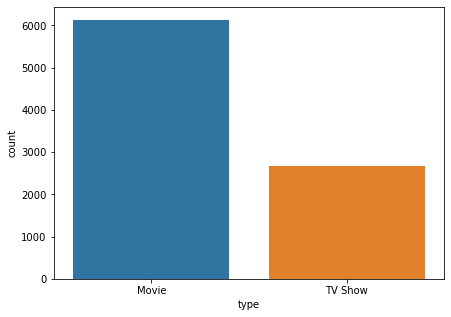

In [67]:
# Visualize the type

plt.rcParams['figure.figsize'] = (7, 5)
sns.countplot(x='type', data=df);

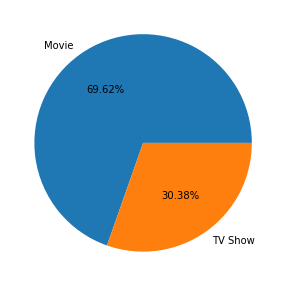

In [78]:
# visualize using pie chart

x = df['type'].value_counts()
y = list(df['type'].value_counts().index)

plt.pie(x=x, labels=y, autopct='%.2f%%');

In [124]:
df['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1925       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

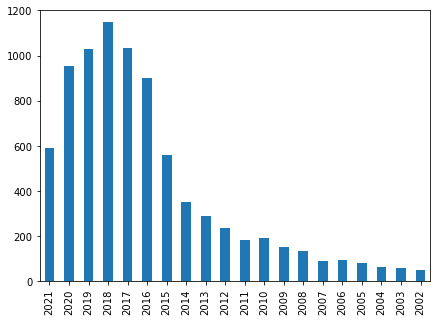

In [144]:
# Visualize In which year More movie/tv show released (In last 20 year)

df['release_year'].value_counts().sort_index(ascending=False).head(20).plot(kind="bar");

In [155]:
# Top 10 country which produced most number of titles

most_titles_produce = df.groupby('country').count().sort_values('title', ascending=False).head(10)
most_titles_produce.reset_index(inplace=True)

In [156]:
most_titles_produce

,country,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
0,United States,3649,3649,3649,3649,3649,3642,3649,3648,3646,3649,3649
1,India,972,972,972,972,972,972,972,972,972,972,972
2,United Kingdom,419,419,419,419,419,418,419,419,419,419,419
3,Japan,245,245,245,245,245,244,245,244,245,245,245
4,South Korea,199,199,199,199,199,199,199,199,199,199,199
5,Canada,181,181,181,181,181,181,181,181,181,181,181
6,Spain,145,145,145,145,145,145,145,145,145,145,145
7,France,124,124,124,124,124,124,124,124,124,124,124
8,Mexico,110,110,110,110,110,110,110,110,110,110,110
9,Egypt,106,106,106,106,106,106,106,106,106,106,106


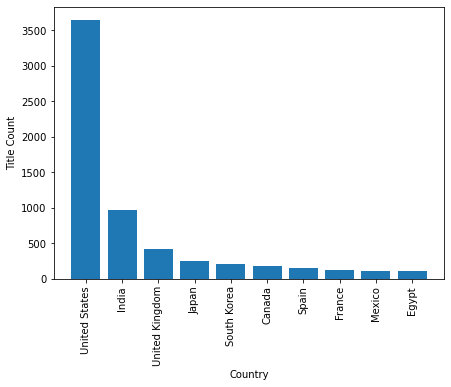

In [161]:
# visualization

plt.bar(x=most_titles_produce.country, height=most_titles_produce.title)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Title Count');

In [171]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


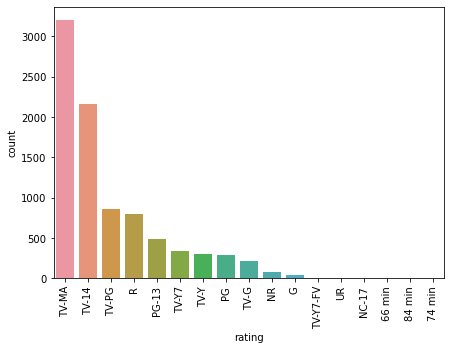

In [180]:
# rating visualization

sns.countplot(x='rating', data=df, order = df['rating'].value_counts().index)
plt.xticks(rotation=90);